In [1]:
import luxpy as lx
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 

## spectral.py: cri_ref(), spd_to_xyz()

REF is normalized to 1 at w_norm = 600 nm (see figure below)

XYZ of light sources --> shape of xyz_REF (Nx3):
(4, 3)

XYZ of spectral refl. fcns --> shape of xyz_Munsell8_REF (NxMx3):
(4, 8, 3)

XYZ of spectral refl. fcns + light sources --> shape of xyz_Munsell8_REF_2 (NxMx3) & xyz_REF_2 (Nx3):
(4, 8, 3)
(4, 3)


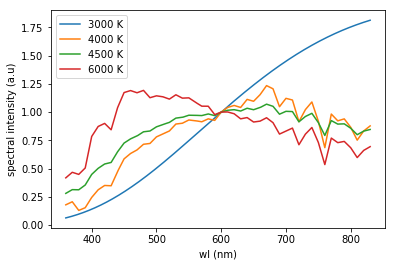

In [2]:
#----------------------------------------------------------------------------------------------------
# set CIE observer:
cieobs = '1964_10'

#----------------------------------------------------------------------------------------------------
# get BB, DL & cierf ref:
ccts = [3000,4000,4500, 6000] #define ccts
ref_types = ['BB','DL','cierf','DL'] # define reference illuminant types
REF = lx.cri_ref(ccts, ref_type = ref_types, normalization = 'lambda', w_norm = 600) # calculate reference illuminants
print('REF is normalized to 1 at w_norm = 600 nm (see figure below)')

#----------------------------------------------------------------------------------------------------
# Get XYZ of a set of light sources only:
xyz_REF = lx.spd_to_xyz(REF,cieobs = cieobs) # direct calculation of illuminant xyz
print('\nXYZ of light sources --> shape of xyz_REF (Nx3):')
print(xyz_REF.shape)

#----------------------------------------------------------------------------------------------------
# Get XYZ of a set of spectral reflectance functions 'illuminated' by a set of light sources:
Munsellrfl8 = lx._cri_rfl['cie-13.3-1995']['8'] # get 8 spectral reflectance functions used in CIE 13.3-1995
xyz_Munsell8_REF = lx.spd_to_xyz(REF,cieobs = cieobs, rfl = Munsellrfl8,relative = True) # direct calculation of illuminant xyz
print('\nXYZ of spectral refl. fcns --> shape of xyz_Munsell8_REF (NxMx3):')
print(xyz_Munsell8_REF.shape)

#----------------------------------------------------------------------------------------------------
# Get XYZ and XYZw of a set of spectral reflectance functions 'illuminated' by a set of light sources:
xyz_Munsell8_REF_2, xyz_REF_2 = lx.spd_to_xyz(REF,cieobs = cieobs, rfl = Munsellrfl8,relative = True, out = 2) # direct calculation of illuminant xyz
print('\nXYZ of spectral refl. fcns + light sources --> shape of xyz_Munsell8_REF_2 (NxMx3) & xyz_REF_2 (Nx3):')
print(xyz_Munsell8_REF_2.shape)
print(xyz_REF_2.shape)

#----------------------------------------------------------------------------------------------------
plt.plot(REF[0],REF[1:].T)
plt.xlabel('wl (nm)')
plt.ylabel('spectral intensity (a.u)')
plt.legend(['{} K'.format(x) for x in ccts])
plt.show()


## colortransforms.py: xyz_to_Yuv(), colortf()


Yuv of spectral refl. fcns + light sources --> shape of Yuv_Munsell8_REF_2 (NxMx3) & Yuv_REF_2 (Nx3):
(4, 8, 3)
(4, 3)


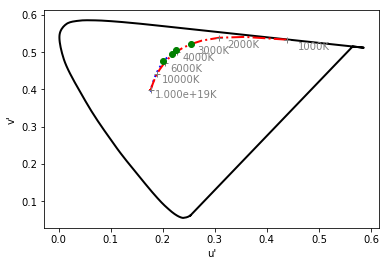


Yuv of light sources --> shape of Yuv_REF (Nx3):
(4, 3)


In [3]:
#----------------------------------------------------------------------------------------------------
# calculate Yuv from xyz (identical for other transforms):
Yuv_REF_2 = lx.xyz_to_Yuv(xyz_REF_2)
Yuv_Munsell8_REF_2 = lx.xyz_to_Yuv(xyz_Munsell8_REF_2)
print('\nYuv of spectral refl. fcns + light sources --> shape of Yuv_Munsell8_REF_2 (NxMx3) & Yuv_REF_2 (Nx3):')
print(Yuv_Munsell8_REF_2.shape)
print(Yuv_REF_2.shape)

#----------------------------------------------------------------------------------------------------
# plot spectrum locus (together with blackbody and daylight locus):
axh = lx.plotSL(cspace='Yuv', cieobs = cieobs,show = False, BBL = True, DL = True)
Y, u,v = np.squeeze(lx.asplit(Yuv_REF_2)) # splits array along last axis
lx.plot_color_data(u,v, formatstr = 'go')

#----------------------------------------------------------------------------------------------------
# use of colortf (works for any transformation that has can be mapped as ..._to_xyz() --> xyz_to_...()):
# Yuv from xyz:
Yuv_REF = lx.colortf(xyz_REF_2, tf = 'Yuv') #start from xyz (equivalent to tf = 'xyz>Yuv')
# Yuv from spd:
Yuv_REF = lx.colortf(REF, tf = 'spd>Yuv')
print('\nYuv of light sources --> shape of Yuv_REF (Nx3):')
print(Yuv_REF.shape)



## cct.py: xyz_to_cct(), cct_to_xyz():

In [5]:
# calculate cct & duv of set of sources:
cct_ohno, duv_ohno = lx.cct.xyz_to_cct(xyz_REF_2,cieobs = cieobs, out = 'cct,duv', mode = 'lut') #use Ohno's approach with Look-Up-Table
cct_search, duv_search = lx.cct.xyz_to_cct(xyz_REF_2,cieobs = cieobs, out = 'cct,duv', mode = 'search') #use brute-force search approach

print('\nOhno: cct, duv:')
print(cct_ohno)
print(duv_ohno)
print('\nSearch: cct, duv:')
print(cct_search)
print(duv_search)

# calculate xyz from cct & duv:
xyz_REF_2_ohno = lx.cct.cct_to_xyz(cct_ohno,duv = duv_ohno, cieobs = cieobs, mode = 'lut') #use Ohno's approach with Look-Up-Table
xyz_REF_2_search = lx.cct.cct_to_xyz(cct_search, duv = duv_search, cieobs = cieobs, mode = 'search') #use brute-force search approach

print('\nOhno: xyzREF_2 - xyz_REF_2_ohno:')
print(xyz_REF_2 - xyz_REF_2_ohno)
print('\nSearch: xyzREF_2 - xyz_REF_2_search:')
print(xyz_REF_2 - xyz_REF_2_search)





Ohno: cct, duv:
[[ 2999.73320996]
 [ 3996.76148586]
 [ 4494.92213738]
 [ 5980.52360684]]
[[  5.04645189e-08]
 [  3.08475171e-03]
 [  1.67273402e-03]
 [  3.45039551e-03]]

Search: cct, duv:
[[ 2999.97339539]
 [ 3997.12250211]
 [ 4495.31152414]
 [ 5980.98351851]]
[[ -1.03160881e-06]
 [  3.08473819e-03]
 [  1.67265083e-03]
 [  3.45039511e-03]]

Ohno: xyzREF_2 - xyz_REF_2_ohno:
[[ -4.03597184e-07   0.00000000e+00   9.28097933e-07]
 [  8.85625624e-07   0.00000000e+00   1.73819231e-06]
 [  1.55442535e-06   0.00000000e+00   6.77689569e-06]
 [  1.94541749e-06   0.00000000e+00   4.01047447e-06]]

Search: xyzREF_2 - xyz_REF_2_search:
[[  5.08331032e-03   0.00000000e+00  -1.18741799e-02]
 [  1.27667101e-06   0.00000000e+00   2.77605525e-06]
 [  1.74498609e-07   0.00000000e+00   1.53755374e-06]
 [ -9.37532273e-05   0.00000000e+00   2.24235084e-03]]
